In [2]:
!pip install citipy


     |████████████████████████████████| 563kB 2.8MB/s 
  Created wheel for citipy: filename=citipy-0.0.5-cp36-none-any.whl size=559701 sha256=cc57dc983398eed0dc799f40b51fb7916bad83e8cba30345b085008ea5236828
  Stored in directory: /root/.cache/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [0]:
#import gmaps
import pandas as pd
import requests
import json
import numpy as np
import time
from urllib.parse import quote
import matplotlib.pyplot as plt

api_key = "Your Key Here"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [29]:
max_temp = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []
humidity = []
city_name = []

cities_df= pd.DataFrame(cities)

cities_df.rename(columns = {list(cities_df)[0]: 'Cities'}, inplace = True)
cities_df

,Cities
0,tutoia
1,neka
2,bintulu
3,rikitea
4,busselton
...,...
602,russell
603,novo selo
604,pangnirtung
605,stykkisholmur


In [0]:
#API requests 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "&units=imperial"
query_url = url + "appid=" + api_key + units +"&q="






for city in cities:
    response = requests.get(query_url + city).json()
    try:
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lat'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
    except KeyError:
        pass
    
#len(max_temp)

In [31]:
  len(city_name)

543

In [45]:
# Create a data frame from cities, lat, maxtemp, humidity, cloudiness and windspeed
data = {
    "city": city_name,
    "country": country,
    "lat": lat,
    "lng": lng,
    "max temp": max_temp,
    "cloudiness": cloudiness,
    "humidity": humidity,
    "wind speed": wind_speed
}
df = pd.DataFrame(data)


df.head()


,city,country,lat,lng,max temp,cloudiness,humidity,wind speed
0,tutoia,BR,-2.76,-2.76,78.22,99,82,6.22
1,neka,IR,36.65,36.65,33.80,97,100,4.70
2,bintulu,MY,3.17,3.17,75.07,90,100,3.36
3,rikitea,PF,-23.12,-23.12,72.81,82,70,12.91
4,busselton,AU,-33.64,-33.64,67.68,0,52,1.99


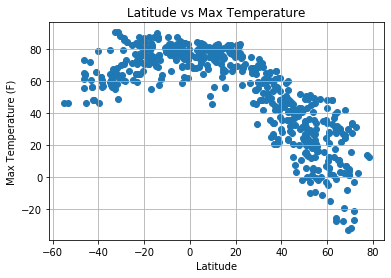

In [52]:
# Create scatter plot for lat and temp
plt.scatter(df["lat"], df["max temp"])

# Create a title, x label, y label, and grid
plt.title("Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
#plt.savefig("lat_vs_mt.png")
plt.show()

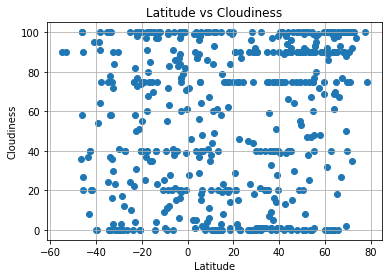

In [51]:
# Create a scatter plot for lat and cloudiness
plt.scatter(df["lat"], df["cloudiness"])

# Create a title, x label, y label, and grid
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
#plt.savefig("lat_vs_c.png")
plt.show()

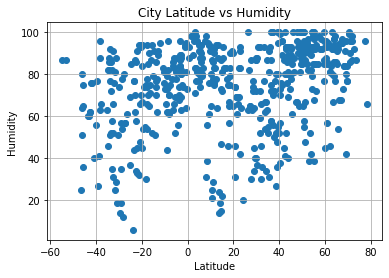

In [50]:
# Create scatter plot for lat vs humidity 
plt.scatter(df["lat"], df["humidity"])
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
#plt.savefig("lat_vs_humidity.png")
plt.show()

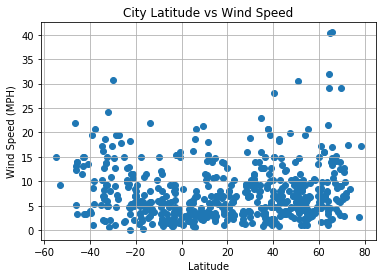

In [48]:
# Scatter plot for lat vs wind speed
plt.scatter(df["lat"], df["wind speed"])

# Create a title, x label, y label, and grid
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
#plt.savefig("lat_vs_ws.png")
plt.show()

In [0]:
from google.colab import files
df.to_csv('weather_data.csv')
files.download("weather_data.csv")